# Mandelbrot magic

By Adriana Ladera

The Mandelbrot set is a *complex* (haha--badum tss!) case of bounding determined by the function:

$z_{n+1}=z_n^2+c$

where $z$ starts at 0 and $c$ is a complex number. $c$ belongs in the Mandelbrot set if, when the equation is applied iteratively, $z_n$ stays bounded for all $n > 0$.

For example, if $c = 1$, then the equation returns
- $z_1 = z_0^2 + 1 = 0 + 1 = 1$
- $z_2 = z_1^2 + 1 = 1^2 + 1 = 2$
- $z_3 = z_2^2 + 1 = 2^2 + 1 = 5$
- $z_4 = z_3^2 + 1 = 5^2 + 1 = 26$
- $z_5 = z_4^2 + 1 = 26^2 + 1 = 677$
.
.
.

which tends to infinity, so 1 isn't in the Mandy set. On the other hand, if $c = i$, we get the sequence

$i, -1 + i, -i, -1 + i, -i, ...$

which is bounded, so yippee! It's in the set!

Follow along to see how you can implement this and plot it :D

## Importing libraries



In [10]:
from matplotlib import pyplot as plt
import numpy as np
import time

## Create the set

Plots the Mandelbrot set.

- **dims** $\rightarrow$ determines the "pixelation" of the final image; higher value = increased "pixel" density
- **x_lims, y_lims** $\rightarrow$ x and y bounds for visualizing the seet
- **max_iter** $\rightarrow$ maximum number of iterations allowed (the number generation can't go on forever!)

In [94]:
def mandelbrot_generator(dims, x_lims, y_lims, max_iter):
    start_time = time.time()

    # create image space
    mandelbrot_image = np.zeros((dims, dims), dtype=float)

    # generate the Mandelbrat
    for x in range(dims):
        for y in range(dims):
            real = x_lims[0] + (x / dims) * (x_lims[1] - x_lims[0])
            imag = y_lims[0] + (y / dims) * (y_lims[1] - y_lims[0])
            c = complex(real, imag)
            z = 0 + 0j 
            iteration = 0
            while abs(z) <= 2 and iteration < max_iter:
                z = z*z + c # Mandelbrot generator
                iteration += 1

            mandelbrot_image[y, x] = iteration

    end_time = time.time()
    elapsed_time = end_time - start_time
    if elapsed_time > 60:
        print(f"Elapsed time: {round(elapsed_time/60,3)} min {round(elapsed_time%60,3)} seconds")
    else:
        print(f"Elapsed time: {round(elapsed_time%60,3)} seconds")

    # plotting your mom aka the Mandelbrat set
    plt.imshow(mandelbrot_image, extent=[x_lims[0], x_lims[1], y_lims[0], y_lims[1]], cmap='turbo') #flag, #nipy_spectral, rainbow, gist_ncar
    plt.colorbar()
    plt.title('Mandelbrot Set')
    plt.xlabel('Real bitches')
    plt.ylabel('Imaginary amigos')
    plt.show()
    
    return mandelbrot_image


## Standard comparison

Elapsed time: 2.089 seconds


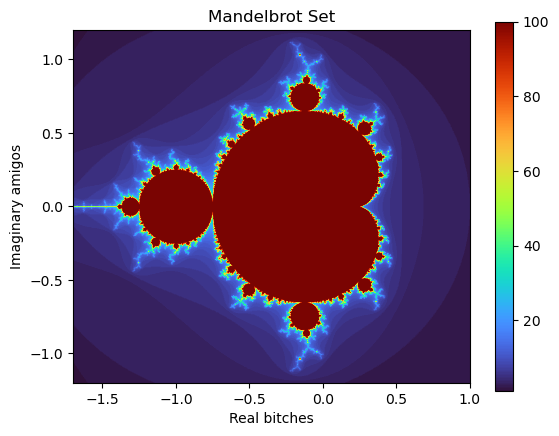

array([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [95]:
mandelbrot_generator(dims=800, x_lims=[-1.7,1.0], y_lims=[-1.2,1.2], max_iter=100)

## What happens if we reduce the dimensions?

Elapsed time: 0.033 seconds


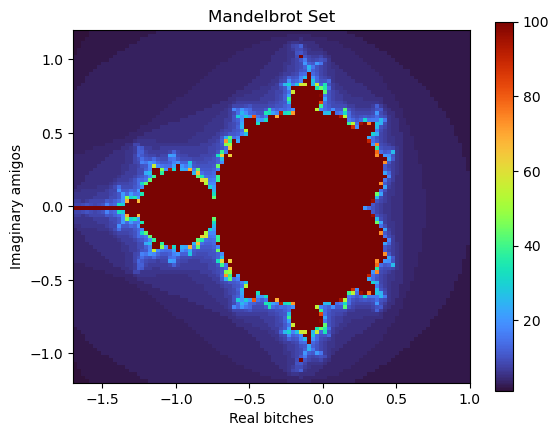

array([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 2., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [96]:
mandelbrot_generator(dims=100, x_lims=[-1.7,1.0], y_lims=[-1.2,1.2], max_iter=100)

## Or increase them?

Elapsed time: 8.702 seconds


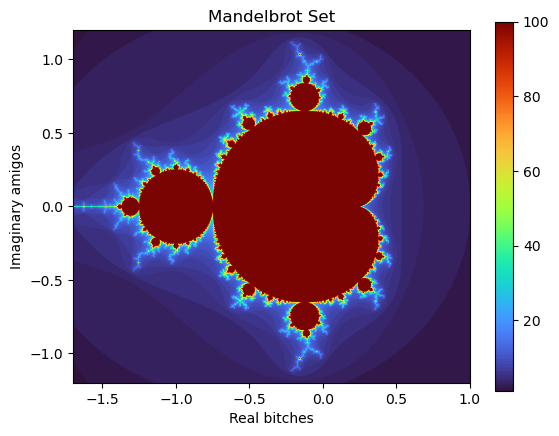

array([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [97]:
mandelbrot_generator(dims=1600, x_lims=[-1.7,1.0], y_lims=[-1.2,1.2], max_iter=100)

## What if we decrease the maximum number of iterations, but keep the dimensions standard?

Elapsed time: 0.781 seconds


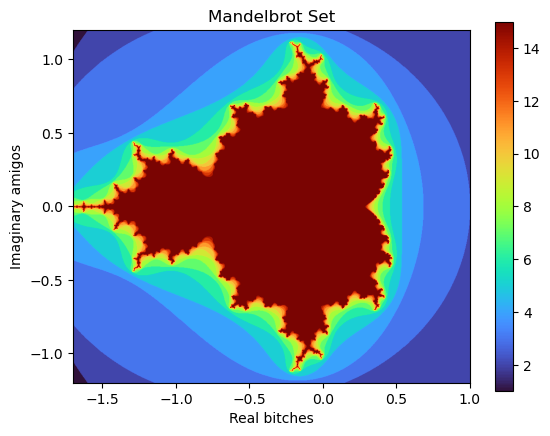

array([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [98]:
mandelbrot_generator(dims=800, x_lims=[-1.7,1.0], y_lims=[-1.2,1.2], max_iter=15)

## Or increase maximum number of iterations, but keep the dimensions standard?

Elapsed time: 5.447 seconds


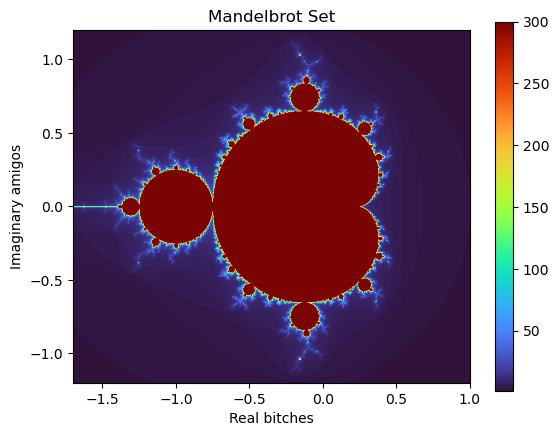

array([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [99]:
mandelbrot_generator(dims=800, x_lims=[-1.7,1.0], y_lims=[-1.2,1.2], max_iter=300)